In [1]:
import pandas as pd
votes = pd.read_csv('114_congress.csv')

In [2]:
print(votes['party'].value_counts())
votes.mean()

R    54
D    44
I     2
Name: party, dtype: int64


00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

In [3]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])



In [4]:
labels = kmeans_model.labels_
pd.crosstab(labels,votes['party'])

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


In [6]:
democratic_outliers = votes[(labels == 0) & (votes["party"] == "D")]
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


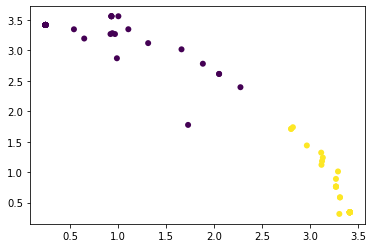

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=senator_distances[:,0],y=senator_distances[:,1],c=labels,linewidths=0)
plt.show()

In [8]:
import numpy as np
extremism = np.sum(senator_distances ** 3,axis=1)
votes['extremism'] = extremism
votes = votes.sort_values('extremism',ascending=False)
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476